## Multiclass Classifier for all risk classes including declined

#### Random Forest

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'C:\Users\milan\Documents\GitHub\DSC-680\\risk_class_all.csv')

y = df['approved_risk_class']
X = df.drop('approved_risk_class', axis=1)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create random forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the classifier on the training set
clf.fit(X_train, y_train)

# # Make predictions on the test set
y_pred = clf.predict(X_test)

# # Evaluate the performance of the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6114140537860949


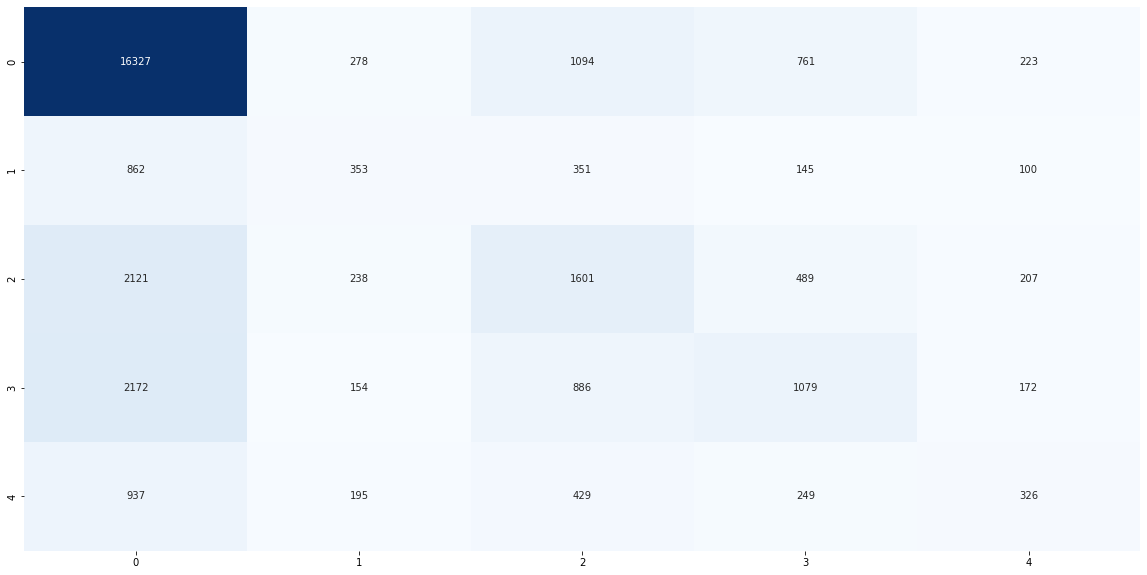

In [117]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.values, y_pred)
df = pd.DataFrame(matrix)
sn.heatmap(df, annot = True, cbar = None, cmap = "Blues", fmt='g')
plt.show()

# Note: rows are true values, columns are predicted
# Rows = recall
# Columns = precision

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79     18683
           1       0.29      0.19      0.23      1811
           2       0.37      0.34      0.36      4656
           3       0.40      0.24      0.30      4463
           4       0.32      0.15      0.21      2136

    accuracy                           0.62     31749
   macro avg       0.42      0.36      0.38     31749
weighted avg       0.58      0.62      0.59     31749



In [119]:
train, test = train_test_split(nt_transformed, test_size=0.2, random_state=42)

features = train.drop('approved_risk_class', axis=1)
target = train['approved_risk_class']
test_features = test.drop('approved_risk_class', axis=1)
test_target = test['approved_risk_class']

In [159]:
# Create pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced'))
])

In [160]:
# Set Parameters
# class_weights = 'balanced'


params = {
    'rf__n_estimators': [120, 140],
    'rf__max_depth': [30, 50],
    'rf__min_samples_split': [2,3],
    'rf__min_samples_leaf': [3,5],
}

### Tune to recall

In [162]:
# GridSearch, Fit, Score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
RF_gs = GridSearchCV(pipe, param_grid=params ,scoring = 'recall_macro', cv = 3)
RF_gs.fit(features, target)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             param_grid={'rf__max_depth': [30, 50],
                         'rf__min_samples_leaf': [3, 5],
                         'rf__min_samples_split': [2, 3],
                         'rf__n_estimators': [120, 140]},
             scoring='recall_macro')

In [163]:
RF_gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_leaf=5, min_samples_split=3,
                                        n_estimators=140))])

In [164]:
pipe = Pipeline([("standardizer", StandardScaler()), ("rf", RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_leaf=5, min_samples_split=3,
                                        n_estimators=140))])
pipe.fit(features, target)
rf_preds = pipe.predict(test_features)
accuracy_score(rf_preds, test_target)

0.5707266370594349

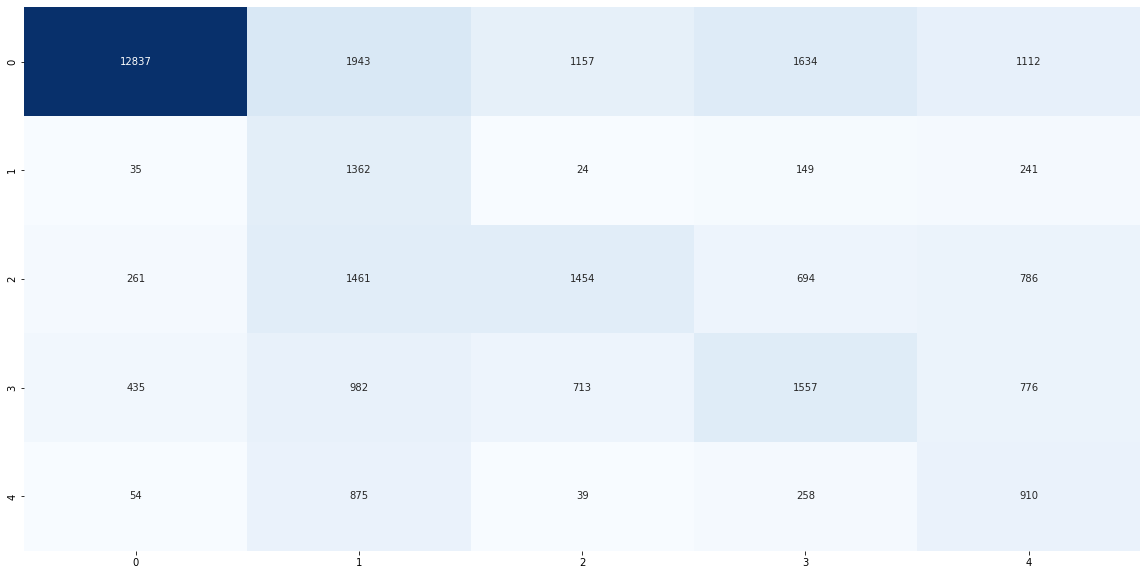

In [165]:
matrix = confusion_matrix(test_target, rf_preds)
df = pd.DataFrame(matrix)
sn.heatmap(df, annot = True, cbar = None, cmap = "Blues", fmt='g')
plt.show()

In [166]:
from sklearn.metrics import classification_report
print(classification_report(test_target, rf_preds))

              precision    recall  f1-score   support

           0       0.94      0.69      0.79     18683
           1       0.21      0.75      0.32      1811
           2       0.43      0.31      0.36      4656
           3       0.36      0.35      0.36      4463
           4       0.24      0.43      0.31      2136

    accuracy                           0.57     31749
   macro avg       0.44      0.51      0.43     31749
weighted avg       0.70      0.57      0.61     31749



In [151]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

sorted(rf_classifier.get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [135]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### Tune to F1

In [167]:
# GridSearch, Fit, Score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
RF_gs = GridSearchCV(pipe, param_grid=params ,scoring = 'f1_macro', cv = 3)
RF_gs.fit(features, target)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_depth=30,
                                                               min_samples_leaf=5,
                                                               min_samples_split=3,
                                                               n_estimators=140))]),
             param_grid={'rf__max_depth': [30, 50],
                         'rf__min_samples_leaf': [3, 5],
                         'rf__min_samples_split': [2, 3],
                         'rf__n_estimators': [120, 140]},
             scoring='f1_macro')

In [168]:
RF_gs.best_estimator_

Pipeline(steps=[('standardizer', StandardScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=50,
                                        min_samples_leaf=3,
                                        n_estimators=140))])

In [169]:
pipe = Pipeline([("standardizer", StandardScaler()), ("rf", RandomForestClassifier(class_weight='balanced', max_depth=50,
                                        min_samples_leaf=3, min_samples_split=3,
                                        n_estimators=140))])
pipe.fit(features, target)
rf_preds = pipe.predict(test_features)
accuracy_score(rf_preds, test_target)

0.5804592270622697

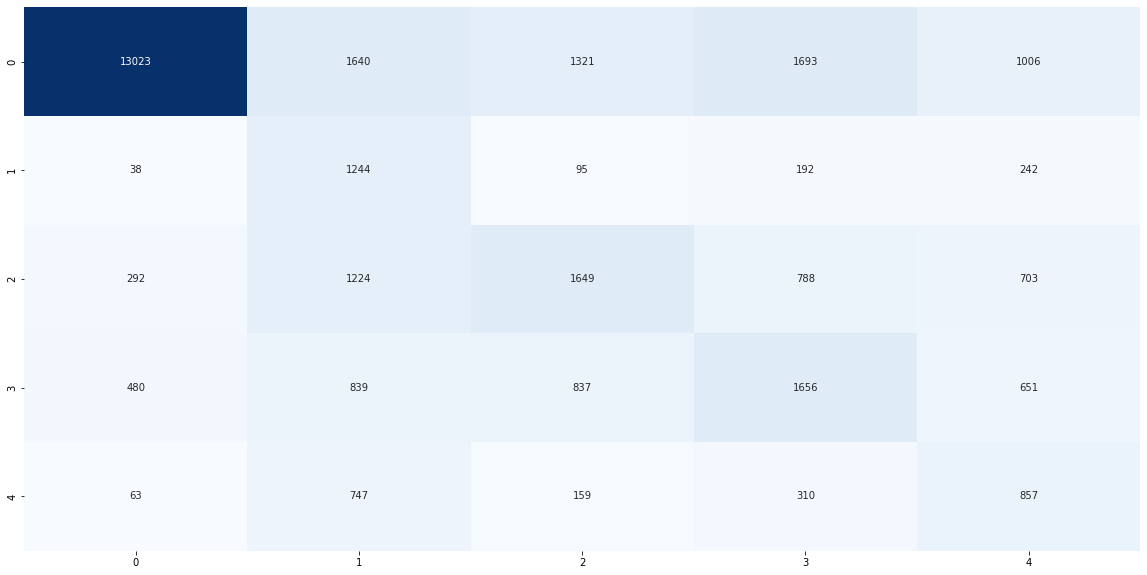

In [170]:
matrix = confusion_matrix(test_target, rf_preds)
df = pd.DataFrame(matrix)
sn.heatmap(df, annot = True, cbar = None, cmap = "Blues", fmt='g')
plt.show()

In [171]:
from sklearn.metrics import classification_report
print(classification_report(test_target, rf_preds))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80     18683
           1       0.22      0.69      0.33      1811
           2       0.41      0.35      0.38      4656
           3       0.36      0.37      0.36      4463
           4       0.25      0.40      0.31      2136

    accuracy                           0.58     31749
   macro avg       0.43      0.50      0.44     31749
weighted avg       0.69      0.58      0.62     31749



## Binary classification for approved

In [1]:
# Create pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion

df = pd.read_csv(r'C:\Users\milan\Documents\GitHub\DSC-680\approved.csv')
print(df.head())

train, test = train_test_split(df, test_size=0.2, random_state=42)

features = train.drop('approved', axis=1)
target = train['approved']
test_features = test.drop('approved', axis=1)
test_target = test['approved']

   Unnamed: 0        age    gender  height  weight     state  bmi_app_state  \
0           0  48.534878  0.419629    68.0   195.0  0.460410      29.646410   
1           1  42.716825  0.419629    67.0   200.0  0.400000      31.321007   
2           2  54.399474  0.419629    66.0   193.0  0.369467      31.147612   
3           3  50.336420  0.408776    63.0   140.0  0.368101      24.797178   
4           4  42.725039  0.408776    61.0   132.0  0.313194      24.938457   

   income_app_state  current_ins  current_ins_value  ...  weight_loss  \
0             36400     0.408371                0.0  ...        False   
1              9528     0.408371                0.0  ...        False   
2              9396     0.408371                0.0  ...        False   
3             82000     0.408371                0.0  ...         True   
4             72000     0.408371                0.0  ...        False   

   weight_loss_amount  weight_loss_reason  cancer_type   citizen  \
0                 

### XGBoost binary classifier

In [2]:
pip install hyperopt 

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import numpy as np
# import pandas as pd
# import xgboost as xgb
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# df = pd.read_csv('approved.csv')
# df.head()

# train, test = train_test_split(df, test_size=0.2, random_state=42)

# features = train.drop('approved', axis=1)
# target = train['approved']
# test_features = test.drop('approved', axis=1)
# test_target = test['approved']

# # Define the model parameters
# params = {'objective': 'binary:logistic',
#           'max_depth': 6,
#           'learning_rate': 0.3,
#           'n_estimators': 100}

# # Train the XGBoost model on the training data
# xgb_model = xgb.XGBClassifier(**params)
# xgb_model.fit(features, target)

# # Make predictions on the testing data
# xgb_preds = xgb_model.predict(test_features)
# accuracy_score(xgb_preds, test_target)

0.895959846325443

In [4]:
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv('approved.csv')
df.head()

train, test = train_test_split(df, test_size=0.2, random_state=42)

features = train.drop('approved', axis=1)
target = train['approved']
test_features = test.drop('approved', axis=1)
test_target = test['approved']

In [7]:
# Create classification matrices
#To set enable_categorical to True, enable automatic encoding of Pandas category columns
dtrain_class = xgb.DMatrix(features, target, enable_categorical=True)
dtest_class = xgb.DMatrix(test_features, test_target, enable_categorical=True)

In [8]:
hyperparameter_grid={'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
                    'max_depth': hp.quniform("max_depth", 3, 18, 1),
                    'gamma': hp.quniform('gamma', 0.1, 1, 0.25),
                    'reg_alpha' : hp.quniform('reg_alpha', 0,1,.01),
                    'reg_lambda' : hp.quniform('reg_lambda', 0,1, .01),     
                    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
                    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
                    'n_estimators': 180,
                    'eta': hp.quniform('eta', 0.025, 0.5, 0.05),
                    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
                    'seed': 0,
                    'eval_metric': 'auc',
                    'objective': 'binary:logistic',
                    'booster': 'gbtree',
                    'tree_method': 'exact'
    }

In [13]:
def objective(space):
    params={'n_estimators':int(space['n_estimators']),
            'max_depth' : int(space['max_depth']), 
            'gamma' : space['gamma'],
            'reg_alpha' : space['reg_alpha'],
            'reg_lambda' : space['reg_lambda'],
            'colsample_bytree':int(space['colsample_bytree']),
            'min_child_weight':int(space['min_child_weight']),
            'eta': space['eta'],
            'subsample':int(space['subsample']),
            'eval_metric': 'auc',
            'objective': 'binary:logistic',
            'booster': 'gbtree',
            'tree_method': 'hist'
            }
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    model=xgb.train(params=params, dtrain=dtrain_class,verbose_eval=50, num_boost_round=num_round)
    pred = model.predict(dtest_class, iteration_range=(1,model.best_ntree_limit))
    score = roc_auc_score(test_target, pred)
    print ("SCORE:", score)
    return {'loss': 1-score, 'status': STATUS_OK }

In [14]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = hyperparameter_grid,
                        algo = tpe.suggest,
                        max_evals = 200,
                        trials = trials)

SCORE:                                                 
0.5                                                    
SCORE:                                                            
0.5                                                               
SCORE:                                                            
0.5                                                               
SCORE:                                                            
0.5                                                               
SCORE:                                                            
0.5                                                               
SCORE:                                                            
0.5                                                               
SCORE:                                                            
0.9172676552895261                                                
SCORE:                                                                            
0

SCORE:                                                                             
0.5                                                                                
SCORE:                                                                             
0.5                                                                                
SCORE:                                                                             
0.5                                                                                
SCORE:                                                                             
0.5                                                                                
SCORE:                                                                             
0.5                                                                                
SCORE:                                                                             
0.5                                                                         

0.9446757494336135                                                                 
SCORE:                                                                             
0.5                                                                                
SCORE:                                                                              
0.9490644932508447                                                                  
SCORE:                                                                              
0.5                                                                                 
SCORE:                                                                              
0.5                                                                                 
SCORE:                                                                              
0.5                                                                                 
SCORE:                                                              

0.9492123429706986                                                                  
SCORE:                                                                              
0.5                                                                                 
SCORE:                                                                              
0.9471866105139511                                                                  
SCORE:                                                                              
0.5                                                                                 
SCORE:                                                                              
0.5                                                                                 
SCORE:                                                                              
0.9493315399348345                                                                  
SCORE:                                                           

0.5                                                                                 
SCORE:                                                                              
0.9511180118131951                                                                  
SCORE:                                                                              
0.9424332971980375                                                                  
SCORE:                                                                              
0.5                                                                                 
SCORE:                                                                              
0.5                                                                                 
SCORE:                                                                              
0.9444736620252809                                                                  
100%|██████████| 200/200 [03:45<00:00,  1.13s/trial, best loss: 0

In [17]:
best_hyperparams

{'colsample_bytree': 1.0,
 'eta': 0.05,
 'gamma': 1.0,
 'max_depth': 11.0,
 'min_child_weight': 4.0,
 'reg_alpha': 0.96,
 'reg_lambda': 0.37,
 'subsample': 1.0}

In [18]:
params = {

    'max_depth':int(best_hyperparams['max_depth']),
    'min_child_weight': int(best_hyperparams['min_child_weight']),
    'eta':best_hyperparams['eta'],
    'subsample': best_hyperparams['subsample'],
    'colsample_bytree': best_hyperparams['colsample_bytree'],
    'gamma':best_hyperparams['gamma'],
    'reg_alpha': best_hyperparams['reg_alpha'], 
    'reg_lambda': best_hyperparams['reg_lambda'],
    "objective": "binary:logistic", 
    "tree_method": "hist",
    'eval_metric':'auc'
}

model = xgb.train(params=params,dtrain=dtrain_class,num_boost_round=num_round,
                  verbose_eval=100,
                  early_stopping_rounds=200 # Activate early stopping
                 )

AssertionError: Must have at least 1 validation dataset for early stopping.

In [ ]:
y_pred = model.predict(dtest_class)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(test_target, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [8]:
labels = [0,3,1,2]
class_names = ['elite', 'preferred', 'select', 'essential']

matrix = confusion_matrix(test_target, cat_preds, labels = labels)
df = pd.DataFrame(matrix, index=class_names, columns=class_names)

fig, ax = plt.subplots(figsize=(12, 6))

sn.heatmap(df, annot=True, cbar=None, cmap="Blues", fmt='g', annot_kws={"size": 16, "weight": "bold"})

    
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

NameError: name 'confusion_matrix' is not defined

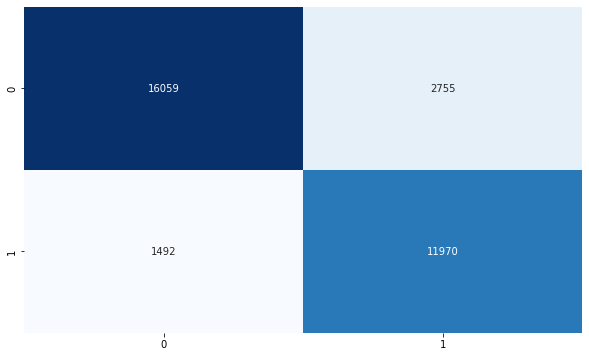

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt

matrix = confusion_matrix(test_target, xgb_preds)
df = pd.DataFrame(matrix)
fig, ax = plt.subplots(figsize=(10, 6))
sn.heatmap(df, annot = True, cbar = None, cmap = "Blues", fmt='g')
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(test_target, xgb_preds))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     18814
           1       0.81      0.89      0.85     13462

    accuracy                           0.87     32276
   macro avg       0.86      0.87      0.87     32276
weighted avg       0.87      0.87      0.87     32276



### Multilcass classification on approved risk classes

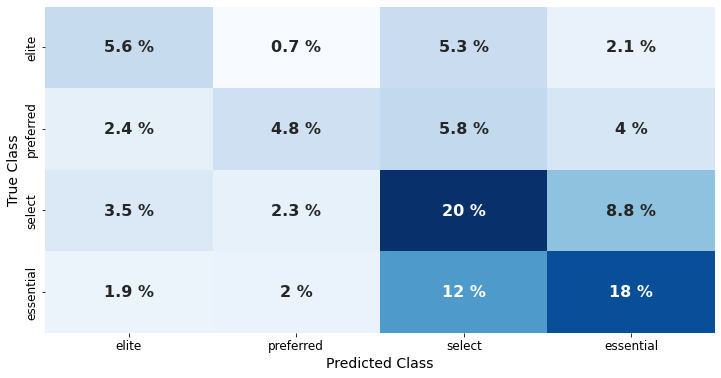

In [9]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = [0,3,1,2]
class_names = ['elite', 'preferred', 'select', 'essential']

matrix = confusion_matrix(test_target, cat_preds, labels = labels)
# df = pd.DataFrame(matrix, index=class_names, columns=class_names)

fig, ax = plt.subplots(figsize=(12, 6))

totals = np.sum(matrix)
percent_matrix = np.round(matrix / totals * 100, 1)
df = pd.DataFrame(percent_matrix, index=class_names, columns=class_names)
res = sn.heatmap(df, annot=True, cbar=None, cmap="Blues",  annot_kws={"size": 16, "weight": "bold"})

for t in res.texts: t.set_text(t.get_text() + " %")
    
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [10]:
print(classification_report(test_target, cat_preds))

              precision    recall  f1-score   support

           0       0.42      0.41      0.41      1761
           1       0.47      0.58      0.52      4505
           2       0.55      0.53      0.54      4400
           3       0.49      0.28      0.36      2184

    accuracy                           0.49     12850
   macro avg       0.48      0.45      0.46     12850
weighted avg       0.49      0.49      0.48     12850



#### Accuracy for males vs. females

In [11]:
cat_pred = cat_preds.reshape(-1)
cat_pred_series = pd.Series(cat_pred, index = test_features.index, name = 'predicted_target')
test_results_df = pd.concat([test_features, test_target, cat_pred_series], axis=1)
test_results_df.head()

,age,gender,height,weight,state,bmi_app_state,income_app_state,current_ins,current_ins_value,replacement_ins,...,weight_loss_amount,weight_loss_reason,cancer_type,citizen,legal_resident,skydive_count,surgery_type,travel_countries,approved_risk_class,predicted_target
51536,29.599513,1.507527,61.0,125.0,1.534609,23.615963,28800,1.547864,0.0,1.530315,...,0.0,1.525318,1.526551,1.557944,1.527538,0.0,1.526091,1.529015,1,1
42501,27.034094,1.544475,62.0,165.0,1.534609,30.175598,33600,1.415928,50000.0,1.530315,...,15.0,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,1,1
25895,41.813316,1.544475,64.0,119.0,1.495556,20.424072,51600,1.415928,500000.0,1.530315,...,0.0,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.289067,1,1
22396,35.751590,1.507527,70.0,210.0,1.495556,30.128571,260000,1.547864,0.0,1.530315,...,0.0,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,1,1
16886,36.586651,1.507527,72.0,206.0,1.495280,27.935571,120000,1.547864,0.0,1.530315,...,20.0,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,0,0


In [12]:
test_results_df['agree'] = test_results_df.apply(lambda x: 1 if x.approved_risk_class == x.predicted_target else 0, axis=1)
test_results_df.head()

,age,gender,height,weight,state,bmi_app_state,income_app_state,current_ins,current_ins_value,replacement_ins,...,weight_loss_reason,cancer_type,citizen,legal_resident,skydive_count,surgery_type,travel_countries,approved_risk_class,predicted_target,agree
51536,29.599513,1.507527,61.0,125.0,1.534609,23.615963,28800,1.547864,0.0,1.530315,...,1.525318,1.526551,1.557944,1.527538,0.0,1.526091,1.529015,1,1,1
42501,27.034094,1.544475,62.0,165.0,1.534609,30.175598,33600,1.415928,50000.0,1.530315,...,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,1,1,1
25895,41.813316,1.544475,64.0,119.0,1.495556,20.424072,51600,1.415928,500000.0,1.530315,...,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.289067,1,1,1
22396,35.751590,1.507527,70.0,210.0,1.495556,30.128571,260000,1.547864,0.0,1.530315,...,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,1,1,1
16886,36.586651,1.507527,72.0,206.0,1.495280,27.935571,120000,1.547864,0.0,1.530315,...,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,0,0,1


In [14]:
test_results_df.groupby(['gender','agree'])['age'].count()

gender    agree
1.507527  0        3226
          1        3118
1.544475  0        3336
          1        3170
Name: age, dtype: int64

1.544475 = female, so this model is slightly more accurate at predicting which risk class a male would be in than a female.  

#### Feature Importance

In [40]:
importance = cat.get_feature_importance()
feature_names = features.columns.tolist()
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
sorted_importance = feature_importance.sort_values('importance', ascending=False)
top_10_features = sorted_importance.head(20)
top_10_features

,feature,importance
5,bmi_app_state,42.732780
0,age,9.103156
14,occupation_description,8.620173
6,income_app_state,7.963089
4,state,5.032669
3,weight,4.191771
12,marijuana_monthly_count,2.626115
31,med_conditions,2.595665
2,height,2.535343
13,marijuana,2.119328


Try balancing classes

In [401]:
class_0 = 12850/1761
class_1 = 12850/4505
class_2 = 12850/4400
class_3 = 12850/2184

class_weights = [class_0, class_1, class_2, class_3]

cat = CatBoostClassifier(
    learning_rate=0.1,
    class_weights = class_weights,
    depth=6,
    l2_leaf_reg=3,
    iterations=1000, # the number of boosting iterations to perform
    random_seed=42, # for reproducibility
    loss_function='MultiClass', # the loss function to optimize
    verbose=False # whether to print training information
)

cat.fit(features, target)
cat_preds = cat.predict(test_features)
accuracy_score(cat_preds, test_target)

0.4619455252918288

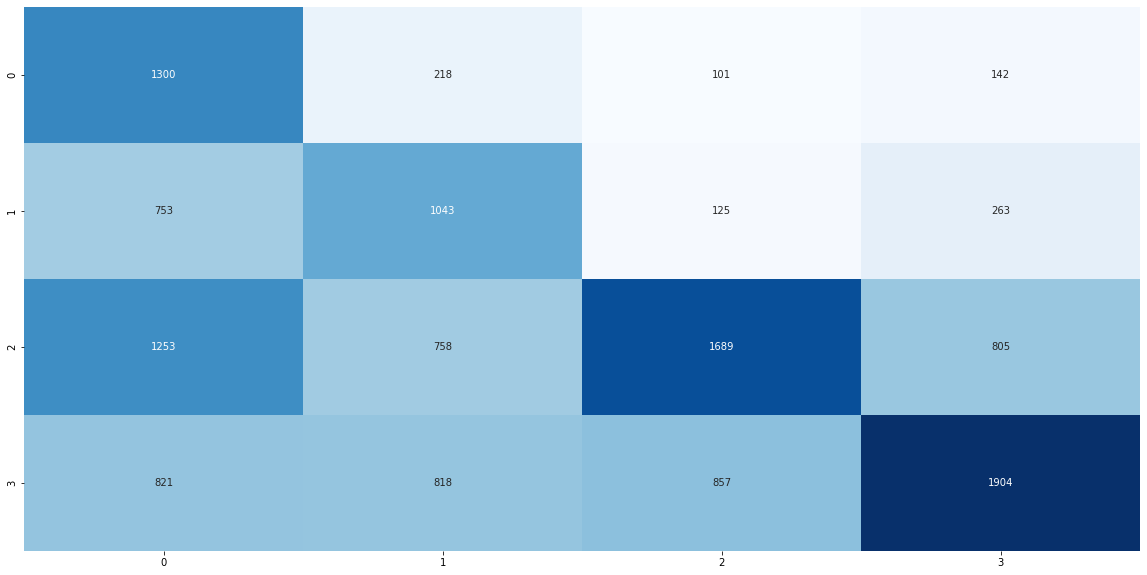

In [402]:
labels = [0,3,1,2]

matrix = confusion_matrix(test_target, cat_preds, labels = labels)
df = pd.DataFrame(matrix)

sn.heatmap(df, annot = True, cbar = None, cmap = "Blues", fmt='g')
plt.show()

In [403]:
print(classification_report(test_target, cat_preds))

              precision    recall  f1-score   support

           0       0.31      0.74      0.44      1761
           1       0.61      0.37      0.46      4505
           2       0.61      0.43      0.51      4400
           3       0.37      0.48      0.42      2184

    accuracy                           0.46     12850
   macro avg       0.48      0.51      0.46     12850
weighted avg       0.53      0.46      0.47     12850



- Accuracy decreased 3%
- Recall increased 6%
- We would like a model that cheats toward select and essential, and so we don't want to balance the classes since select and essential are the larger classes.  So the best model is the unbalanced catboost.

### XGBoost Model

In [78]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv('approved_risk_class.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,age,gender,height,weight,state,bmi_app_state,income_app_state,current_ins,current_ins_value,replacement_ins,...,weight_loss,weight_loss_amount,weight_loss_reason,cancer_type,citizen,legal_resident,skydive_count,surgery_type,travel_countries,approved_risk_class
0,38.029528,1.544475,61.0,110.0,1.401762,20.782048,67000,1.547864,0.0,1.530315,...,False,0.0,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,0
1,23.236617,1.544475,62.0,180.0,1.541045,32.918835,15600,1.547864,0.0,1.530315,...,False,0.0,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,1
2,49.271374,1.544475,64.0,130.0,1.611661,22.312012,29380,1.415928,15000.0,1.530315,...,False,0.0,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,2
3,44.652525,1.544475,65.0,135.0,1.465253,22.462722,103844,1.415928,8000.0,1.530315,...,False,0.0,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.529015,0
4,52.507581,1.544475,63.0,188.0,1.495280,33.299068,60000,1.547864,0.0,1.530315,...,False,0.0,1.525318,1.526551,1.524298,1.527538,0.0,1.526091,1.526101,1


In [79]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

features = train.drop('approved_risk_class', axis=1)
target = train['approved_risk_class']
test_features = test.drop('approved_risk_class', axis=1)
test_target = test['approved_risk_class']

In [80]:
dtrain = xgb.DMatrix(features, label=target)
dtest = xgb.DMatrix(test_features, label=test_target)

In [81]:
params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.9,
    'colsample_bytree': 0.8
}


In [82]:
num_round = 100
model = xgb.train(params, dtrain, num_round)


In [83]:
y_pred = model.predict(dtest)

In [84]:
accuracy = accuracy_score(test_target, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4920622568093385


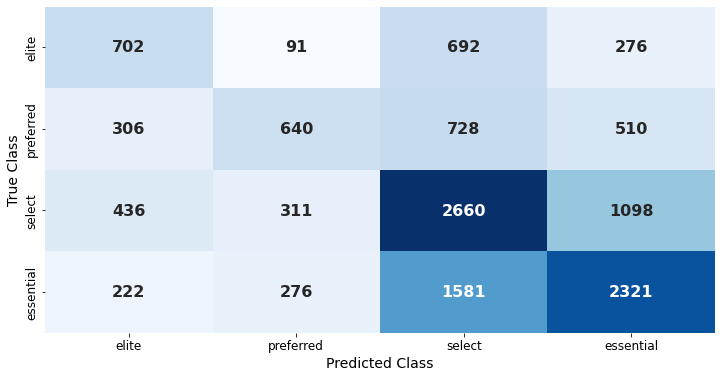

In [85]:
import seaborn as sn
import matplotlib.pyplot as plt

labels = [0,3,1,2]
class_names = ['elite', 'preferred', 'select', 'essential']

labels = [0,3,1,2]

matrix = confusion_matrix(test_target, y_pred, labels = labels)
df = pd.DataFrame(matrix, index=class_names, columns=class_names)

fig, ax = plt.subplots(figsize=(12, 6))

sn.heatmap(df, annot=True, cbar=None, cmap="Blues", fmt='g', annot_kws={"size": 16, "weight": "bold"})

    
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [18]:
print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.40      0.40      1761
           1       0.47      0.59      0.52      4505
           2       0.55      0.53      0.54      4400
           3       0.49      0.30      0.37      2184

    accuracy                           0.49     12850
   macro avg       0.48      0.45      0.46     12850
weighted avg       0.49      0.49      0.49     12850



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = [0,3,1,2]
class_names = ['elite', 'preferred', 'select', 'essential']

matrix = confusion_matrix(test_target, cat_preds, labels = labels)
# df = pd.DataFrame(matrix, index=class_names, columns=class_names)

fig, ax = plt.subplots(figsize=(12, 6))

totals = np.sum(matrix)
percent_matrix = np.round(matrix / totals * 100, 1)
df = pd.DataFrame(percent_matrix, index=class_names, columns=class_names)
res = sn.heatmap(df, annot=True, cbar=None, cmap="Blues",  annot_kws={"size": 16, "weight": "bold"})

for t in res.texts: t.set_text(t.get_text() + " %")
    
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
